<a href="https://colab.research.google.com/github/DreenTS/NeuroEducation/blob/master/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%87%D0%BD%D1%8B%D0%BC_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Решить задачу предсказания (прогнозирования) по табличным данным датасета Adult, используя различные модели классификации:

* XGBoost
* PassiveAggressiveClassifier
* MLP
* TabNet
* LogisticRegression

### Установка и импорт необходимых библиотек, классов, функций

In [ ]:
pip install pytorch-tabnet

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Классификаторы
from xgboost import XGBClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

# Функции для предобработки данных
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Функция для оценки точности модели
from sklearn.metrics import accuracy_score

# Функция построения матрицы ошибок
from sklearn.metrics import confusion_matrix

In [ ]:
def show_confusion_matrix(test_labels, test_classes):
    # Вычисление матрицы ошибок и ее нормализация
    plt.figure(figsize=(3, 3))
    confusion = confusion_matrix(test_labels, test_classes)
    confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
    axis_labels = range(3)
    ax = sns.heatmap(
        confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
        cmap='Blues', annot=True, fmt='.4f', square=True)
    plt.title("Матрица ошибок")
    plt.ylabel("Истинные метки")
    plt.xlabel("Предсказанные метки")

### Загрузка датасета

In [ ]:
# Объявляем глобальные переменные для ссылки на датасет и наименований датафрейма
DATASET_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
COLUMNS = [
    "age", "type_employer", "fnlwgt", "education", "education_num", "marital",
    "occupation", "relationship", "race","sex", "capital_gain", "capital_loss",
    "hr_per_week","country", "income"
]

In [ ]:
# Считываем датасет
df = pd.read_csv(DATASET_URL, names=COLUMNS)
df

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Предобработка данных

In [ ]:
# Определение признаков и меток
X = df.drop(['income'], axis=1)
y = df['income']

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Объявляем переменную для списка столбцов, к которым будем применять преобразование
categorical = ['type_employer', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex', 'country']

# Преобразование признаков в числовые значения
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

# Преобразование меток в числовые значения
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# Масштабируем значения
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)

In [ ]:
# Объявляем переменную, в которой будем хранить словарь значений точности моделей
accs_dict = {}

### Классификатор XGBoost

In [ ]:
# Обучаем модель классификатора XGBoost
xgboost_classifier = XGBClassifier()
xgboost_classifier.fit(X_train, y_train)

# Делаем предсказание на тестовом наборе
y_pred = xgboost_classifier.predict(X_test)

# Проводим оценку точности
xgboost_acc = accuracy_score(y_test, y_pred)
accs_dict['XGBClassifier'] = xgboost_acc
print(f'Точность модели: {xgboost_acc * 100:.2f}%')

Точность модели: 84.65%


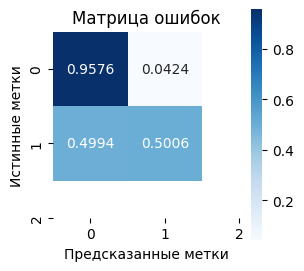

In [ ]:
show_confusion_matrix(y_test, y_pred)

### Классификатор PassiveAggressiveClassifier

In [ ]:
# Обучаем модель классификатора PassiveAggressiveClassifier
passagr_classifier = PassiveAggressiveClassifier()
passagr_classifier.fit(X_train, y_train)

# Делаем предсказание на тестовом наборе
y_pred = passagr_classifier.predict(X_test)

# Проводим оценку точности
passagrg_acc = accuracy_score(y_test, y_pred)
accs_dict['PassiveAggressiveClassifier'] = passagrg_acc
print(f'Точность модели: {passagrg_acc * 100:.2f}%')

Точность модели: 68.17%


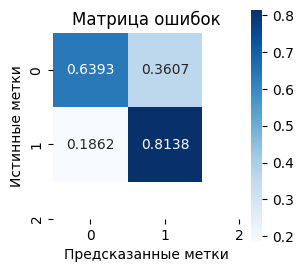

In [ ]:
show_confusion_matrix(y_test, y_pred)

### Классификатор MLP


In [ ]:
# Обучаем модель классификатора MLPClassifier
mlp_classifier = MLPClassifier(max_iter=50)
mlp_classifier.fit(X_train, y_train)

# Делаем предсказание на тестовом наборе
y_pred = mlp_classifier.predict(X_test)

# Проводим оценку точности
mlp_acc = accuracy_score(y_test, y_pred)
accs_dict['MLPClassifier'] = mlp_acc
print(f'Точность модели: {mlp_acc * 100:.2f}%')

Точность модели: 84.37%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


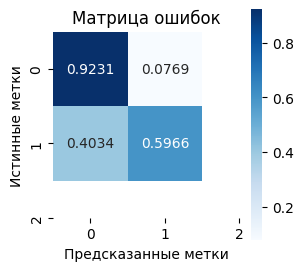

In [ ]:
show_confusion_matrix(y_test, y_pred)

### Классификатор TabNet

In [ ]:
# Обучаем модель классификатора TabNetClassifier
tabnet_classifier = TabNetClassifier(verbose=0)
tabnet_classifier.fit(X_train.to_numpy(), y_train)

# Делаем предсказание на тестовом наборе
y_pred = tabnet_classifier.predict(X_test.to_numpy())

# Проводим оценку точности
tabnet_acc = accuracy_score(y_test, y_pred)
accs_dict['TabNetClassifier'] = tabnet_acc
print(f'Точность модели: {tabnet_acc * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


Точность модели: 84.17%


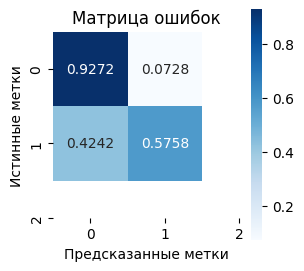

In [ ]:
show_confusion_matrix(y_test, y_pred)

### Классификатор LogisticRegression

In [ ]:
# Обучаем модель классификатора LogisticRegression
logreg_classifier = LogisticRegression(penalty=None)
logreg_classifier.fit(X_train.to_numpy(),y_train)

# Делаем предсказание на тестовом наборе
y_pred = logreg_classifier.predict(X_test.to_numpy())

# Выводим оценку точности модели
logreg_acc = accuracy_score(y_test, y_pred)
accs_dict['LogisticRegression'] = logreg_acc
print(f'Точность модели: {logreg_acc * 100:.2f}%')

Точность модели: 81.71%


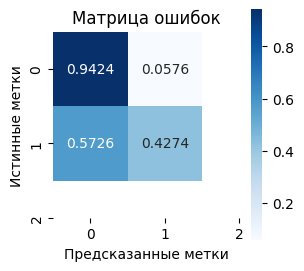

In [ ]:
show_confusion_matrix(y_test, y_pred)

### Сравнение моделей

In [ ]:
# Преобразовываем наш словарь в датафрейм
perc_accuracy = [f'{x * 100:.2f}%' for x in accs_dict.values()]
accuracy_df = pd.DataFrame(dict(model=accs_dict.keys(), accuracy=accs_dict.values(), perc_accuracy=perc_accuracy))

In [ ]:
accuracy_df

,model,accuracy,perc_accuracy
0,XGBClassifier,0.846461,84.65%
1,PassiveAggressiveClassifier,0.681713,68.17%
2,MLPClassifier,0.843697,84.37%
3,TabNetClassifier,0.841701,84.17%
4,LogisticRegression,0.817135,81.71%


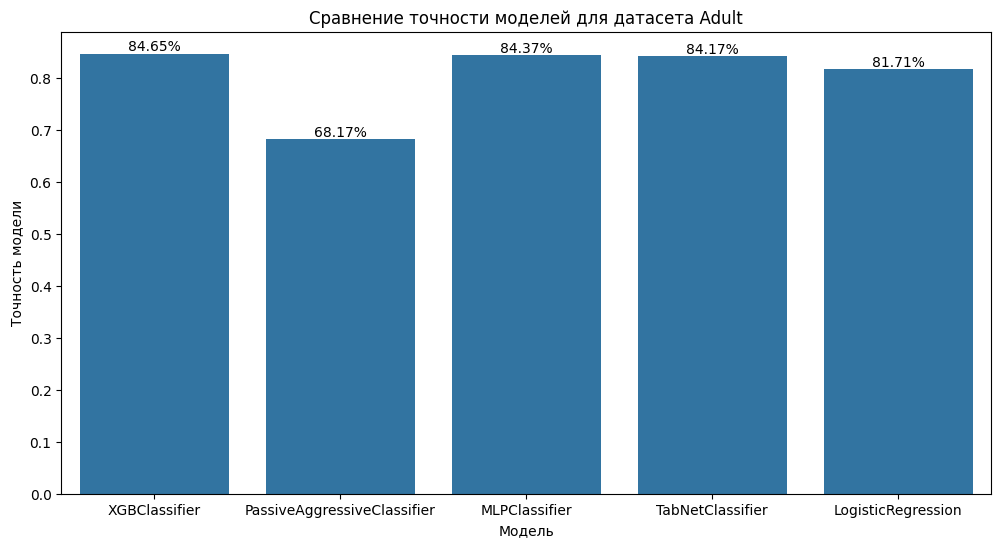

In [ ]:
# Создаем plot
plt.figure(figsize=(12,6))
plt.title("Сравнение точности моделей для датасета Adult")

# Создаем график
graph = sns.barplot(x='model', y='accuracy', data=accuracy_df)
graph.bar_label(graph.containers[0], accuracy_df.perc_accuracy)

# отображаем график
plt.xlabel('Модель')
plt.ylabel('Точность модели')
plt.show()

Самую высокую точность показала модель XSBoost.